# Overview

Description
Welcome to one of our "Getting Started" competitions 👋
This particular challenge is perfect for data scientists looking to get started with Natural Language Processing. The competition dataset is not too big, and even if you don’t have much personal computing power, you can do all of the work in our free, no-setup, Jupyter Notebooks environment called Kaggle Notebooks.

If you want to talk with other users about this competition, come join our Discord! We've got channels for competitions, job postings and career discussions, resources, and socializing with your fellow data scientists. Follow the link here: https://discord.gg/kaggle

Competition Description
Twitter has become an important communication channel in times of emergency.
The ubiquitousness of smartphones enables people to announce an emergency they’re observing in real-time. Because of this, more agencies are interested in programatically monitoring Twitter (i.e. disaster relief organizations and news agencies).

But, it’s not always clear whether a person’s words are actually announcing a disaster. 

For ore details, click here : https://www.kaggle.com/competitions/nlp-getting-started

In [132]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno
import time

%matplotlib inline
import os
from os import listdir
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, auc, roc_auc_score, roc_curve, confusion_matrix
from glob import glob

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/nlp-getting-started/sample_submission.csv
/kaggle/input/nlp-getting-started/train.csv
/kaggle/input/nlp-getting-started/test.csv


In [4]:
df_train = pd.read_csv('/kaggle/input/nlp-getting-started/train.csv',sep=',')
df_test = pd.read_csv('/kaggle/input/nlp-getting-started/test.csv',sep=',')

# 1 data cleaning

In [5]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7613 entries, 0 to 7612
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   id        7613 non-null   int64 
 1   keyword   7552 non-null   object
 2   location  5080 non-null   object
 3   text      7613 non-null   object
 4   target    7613 non-null   int64 
dtypes: int64(2), object(3)
memory usage: 297.5+ KB


In [6]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3263 entries, 0 to 3262
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   id        3263 non-null   int64 
 1   keyword   3237 non-null   object
 2   location  2158 non-null   object
 3   text      3263 non-null   object
dtypes: int64(1), object(3)
memory usage: 102.1+ KB


<Axes: >

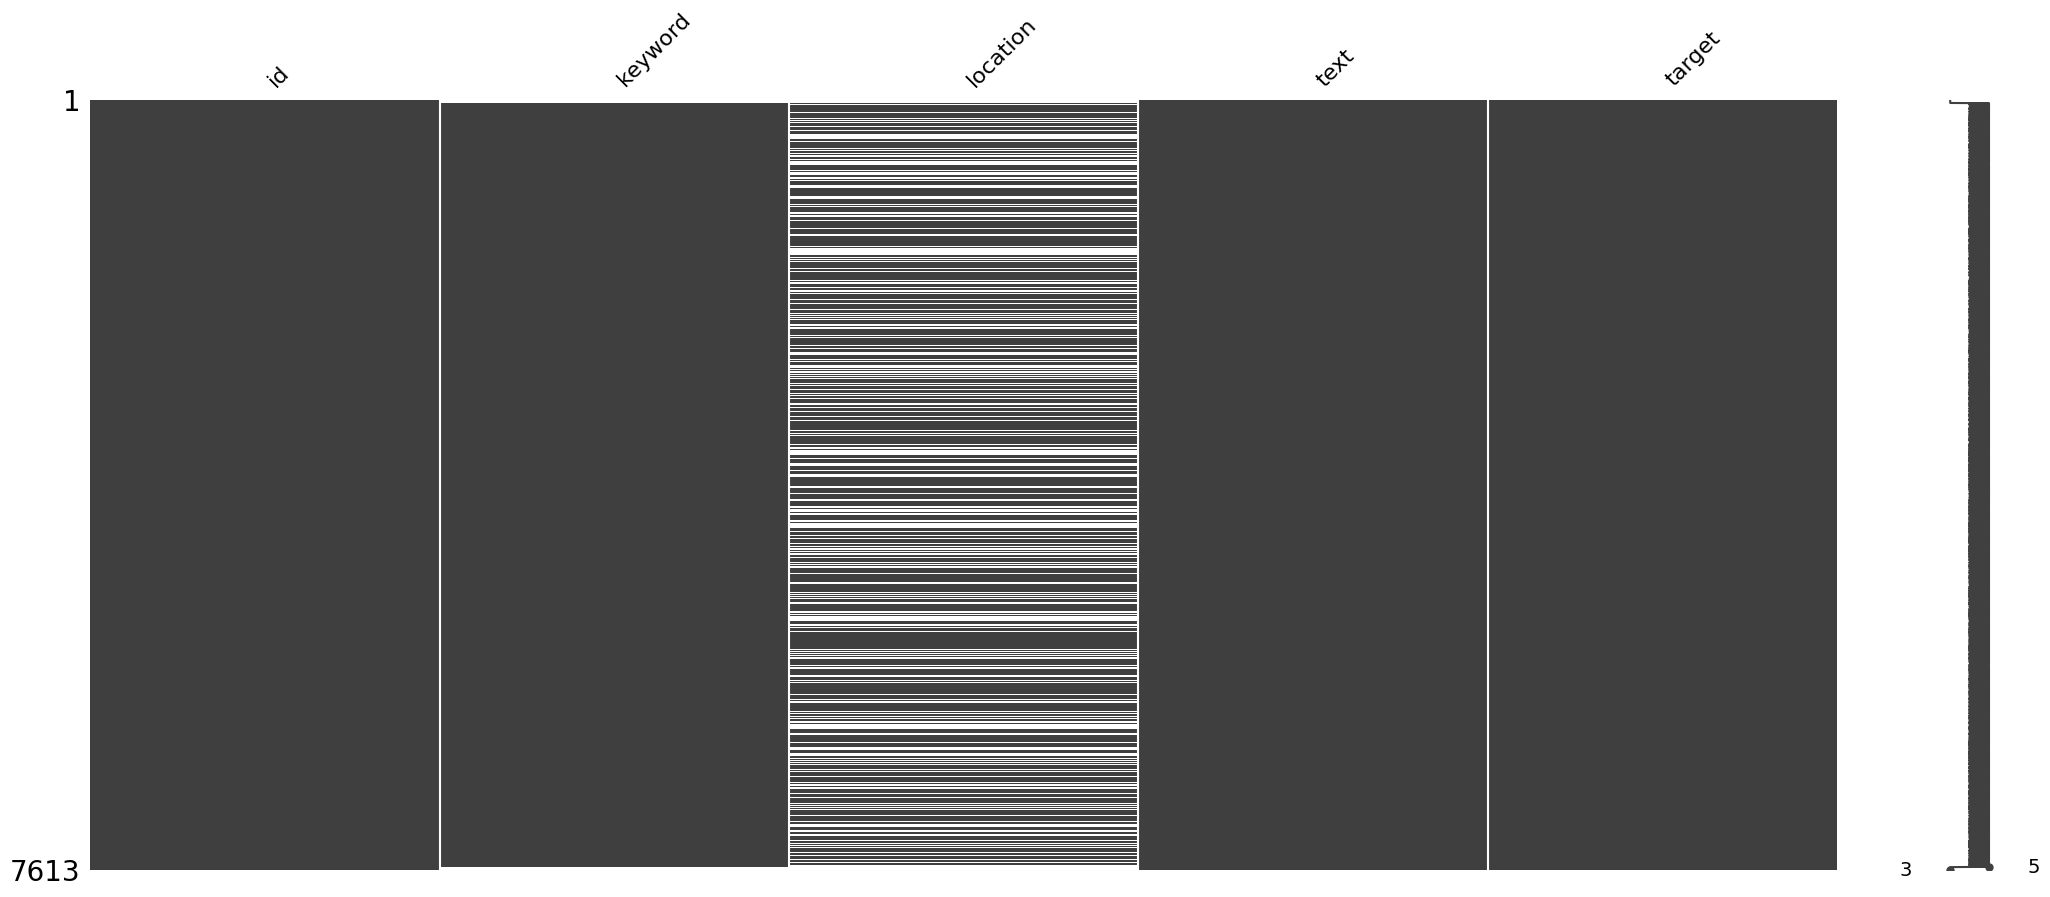

In [7]:
msno.matrix(df_train)

In [8]:
df_train.location.value_counts()

location
USA                    104
New York                71
United States           50
London                  45
Canada                  29
                      ... 
Some pum pum             1
Paulton, England         1
SEA Server               1
todaysbigstock.com       1
???????? ?????????.      1
Name: count, Length: 3341, dtype: int64

In [9]:
df_train.location.unique()

array([nan, 'Birmingham', 'Est. September 2012 - Bristol', ...,
       'Vancouver, Canada', 'London ', 'Lincoln'], dtype=object)

In [10]:
df_train.target.unique()

array([1, 0])

In [11]:
df_train.isna().mean()

id          0.000000
keyword     0.008013
location    0.332720
text        0.000000
target      0.000000
dtype: float64

In [12]:
df_train.keyword.unique()

array([nan, 'ablaze', 'accident', 'aftershock', 'airplane%20accident',
       'ambulance', 'annihilated', 'annihilation', 'apocalypse',
       'armageddon', 'army', 'arson', 'arsonist', 'attack', 'attacked',
       'avalanche', 'battle', 'bioterror', 'bioterrorism', 'blaze',
       'blazing', 'bleeding', 'blew%20up', 'blight', 'blizzard', 'blood',
       'bloody', 'blown%20up', 'body%20bag', 'body%20bagging',
       'body%20bags', 'bomb', 'bombed', 'bombing', 'bridge%20collapse',
       'buildings%20burning', 'buildings%20on%20fire', 'burned',
       'burning', 'burning%20buildings', 'bush%20fires', 'casualties',
       'casualty', 'catastrophe', 'catastrophic', 'chemical%20emergency',
       'cliff%20fall', 'collapse', 'collapsed', 'collide', 'collided',
       'collision', 'crash', 'crashed', 'crush', 'crushed', 'curfew',
       'cyclone', 'damage', 'danger', 'dead', 'death', 'deaths', 'debris',
       'deluge', 'deluged', 'demolish', 'demolished', 'demolition',
       'derail', 'der

In [13]:
df_train = df_train.loc[df_train.keyword.dropna().index]

In [14]:
df_train.dropna(inplace=True)
df_train.isna().mean()

id          0.0
keyword     0.0
location    0.0
text        0.0
target      0.0
dtype: float64

In [15]:
df_train.reset_index(inplace=True, drop = True)

In [16]:
df_train

,id,keyword,location,text,target
0,48,ablaze,Birmingham,@bbcmtd Wholesale Markets ablaze http://t.co/l...,1
1,49,ablaze,Est. September 2012 - Bristol,We always try to bring the heavy. #metal #RT h...,0
2,50,ablaze,AFRICA,#AFRICANBAZE: Breaking news:Nigeria flag set a...,1
3,52,ablaze,"Philadelphia, PA",Crying out for more! Set me ablaze,0
4,53,ablaze,"London, UK",On plus side LOOK AT THE SKY LAST NIGHT IT WAS...,0
...,...,...,...,...,...
5075,10826,wrecked,TN,On the bright side I wrecked http://t.co/uEa0t...,0
5076,10829,wrecked,#NewcastleuponTyne #UK,@widda16 ... He's gone. You can relax. I thoug...,0
5077,10831,wrecked,"Vancouver, Canada",Three days off from work and they've pretty mu...,0
5078,10832,wrecked,London,#FX #forex #trading Cramer: Iger's 3 words tha...,0


In [17]:
# this tweet is 
df_train.text.unique()[1],'target :', df_train.target.values[1]

('We always try to bring the heavy. #metal #RT http://t.co/YAo1e0xngw',
 'target :',
 0)

In [18]:
txt = [txt.split('http')[0] for txt in df_train.text]
len(txt)

5080

In [19]:
corpus = [''.join(''.join(text)) for text in txt]
corpus[:5]

['@bbcmtd Wholesale Markets ablaze ',
 'We always try to bring the heavy. #metal #RT ',
 '#AFRICANBAZE: Breaking news:Nigeria flag set ablaze in Aba. ',
 'Crying out for more! Set me ablaze',
 'On plus side LOOK AT THE SKY LAST NIGHT IT WAS ABLAZE ']

# 2 EDA

In [20]:
import spacy

nlp = spacy.load("en_core_web_sm")


In [21]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to /usr/share/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [22]:
tokenizer = nltk.RegexpTokenizer(r'\w+')

In [23]:
txt[:3]

['@bbcmtd Wholesale Markets ablaze ',
 'We always try to bring the heavy. #metal #RT ',
 '#AFRICANBAZE: Breaking news:Nigeria flag set ablaze in Aba. ']

In [24]:
doc = nlp(str(txt))

token = [word.text for word in doc if (word.is_stop == False) and (word.is_punct==False)]

In [25]:
from collections import Counter
# and count the words
word_counts = Counter(token)

In [26]:
most_common_words = list(word_counts.most_common(10))[1:]

<Axes: xlabel='words', ylabel='occurences'>

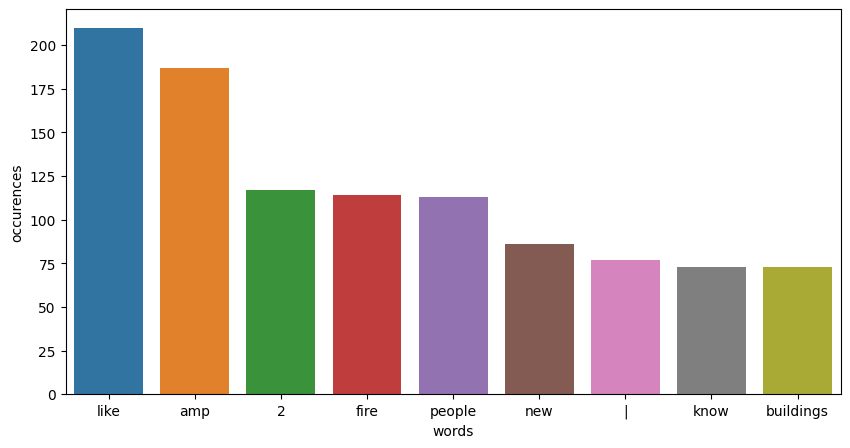

In [27]:
#  The graph shows the most common words in tweets.
df_common_word = pd.DataFrame(most_common_words, columns=['words','occurences'])
plt.subplots(figsize = (10,5))
sns.barplot(df_common_word, x ='words', y ='occurences')

In [179]:
# Lemmatize sentence 
txt_lemmatize = [[txt_lemmatize.lemma_ for txt_lemmatize in nlp(text)] for text in txt]


In [180]:
df_test_txt_lemmatize = [[txt_lemmatize.lemma_ for txt_lemmatize in nlp(text)] for text in df_test.text]

In [29]:
corpus = [' '.join(sentence) for sentence in txt_lemmatize]

In [30]:
# I encode the wotd in digit 
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf = TfidfVectorizer()

tfidf

TfidfVectorizer()

In [31]:
sparse = tfidf.fit_transform(corpus)
sparse.shape

(5080, 11475)

# Vizualisation of two classes with TSNE

I use TSNE to visualise the bag of words in two dimensions to see how they are represented.

In [32]:
from sklearn.manifold import TSNE

import time

tsne = TSNE(n_components=2, perplexity=30, n_iter=1000, init='random', random_state=6)

X = sparse

print('X : ',X.shape)

temps1 = time.time()

X_tsne = tsne.fit_transform(X)

duration1=time.time()-temps1

print("temps de T-SNE : ", "%15.2f" % duration1, "secondes")

X :  (5080, 11475)
temps de T-SNE :            32.77 secondes


In [33]:
# The classes are well balanced 
df_train.target.value_counts()

target
0    2884
1    2196
Name: count, dtype: int64

/tmp/ipykernel_34/601834501.py:6: UserWarning: The palette list has more values (6) than needed (2), which may not be intended.
  sns.scatterplot(


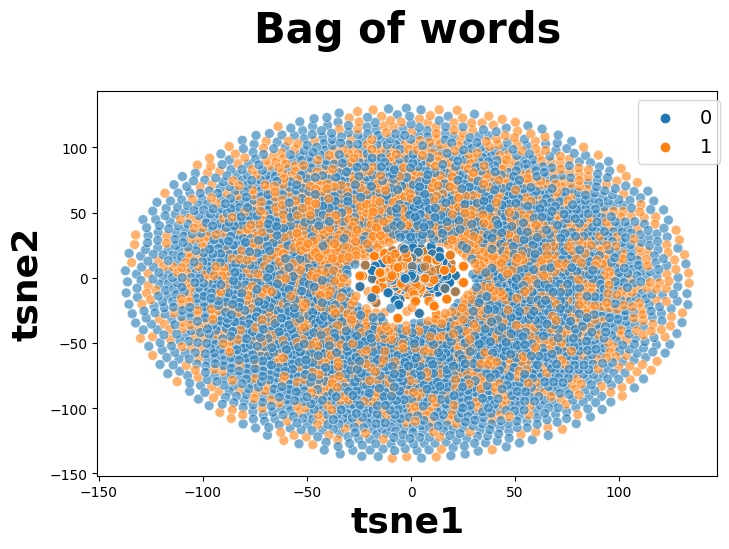

In [34]:
df_tsne = pd.DataFrame(X_tsne, columns=['tsne1', 'tsne2'])
df_tsne["class"] = df_train.target

plt.figure(figsize=(8,5))

sns.scatterplot(
    data=df_tsne,
    x="tsne1", 
    y="tsne2",
    hue="class",
    palette=sns.color_palette('tab10', n_colors=6),
    s=50,
    alpha=0.6,
    legend="brief")

plt.title('Bag of words', fontsize = 30, pad = 35, fontweight = 'bold')
plt.xlabel('tsne1', fontsize = 26, fontweight = 'bold')
plt.ylabel('tsne2', fontsize = 26, fontweight = 'bold')
plt.legend(prop={'size': 14}, bbox_to_anchor=(1.02, 1)) 

plt.show()

As you can see, the real classes are not well divided

In [35]:
df_train2 = df_train.loc[:,['keyword','location','target']]
df_train2

,keyword,location,target
0,ablaze,Birmingham,1
1,ablaze,Est. September 2012 - Bristol,0
2,ablaze,AFRICA,1
3,ablaze,"Philadelphia, PA",0
4,ablaze,"London, UK",0
...,...,...,...
5075,wrecked,TN,0
5076,wrecked,#NewcastleuponTyne #UK,0
5077,wrecked,"Vancouver, Canada",0
5078,wrecked,London,0


In [36]:
df_train2.keyword.unique().shape

(221,)

# 2.1 encode variables

In [37]:
from sklearn.preprocessing import LabelEncoder


In [38]:
def encode_variable(colonne, df = object):
    le = LabelEncoder()
    for col in colonne:
        df[col] = le.fit_transform(df[col])
    return df

In [39]:
df_train2 = encode_variable(['keyword'], df_train2)
df_train2

,keyword,location,target
0,0,Birmingham,1
1,0,Est. September 2012 - Bristol,0
2,0,AFRICA,1
3,0,"Philadelphia, PA",0
4,0,"London, UK",0
...,...,...,...
5075,220,TN,0
5076,220,#NewcastleuponTyne #UK,0
5077,220,"Vancouver, Canada",0
5078,220,London,0


In [40]:
df_train2 = encode_variable(['location'], df_train2)
df_train2

,keyword,location,target
0,0,453,1
1,0,922,0
2,0,209,1
3,0,2054,0
4,0,1516,0
...,...,...,...
5075,220,2473,0
5076,220,50,0
5077,220,2703,0
5078,220,1507,0


In [41]:
df_sparse = pd.DataFrame(sparse.toarray())
df_sparse

,0,1,2,3,4,5,6,7,8,9,...,11465,11466,11467,11468,11469,11470,11471,11472,11473,11474
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5075,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5076,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5077,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5078,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [42]:
df_train3 = pd.concat([df_sparse, df_train2.target], axis=1)
df_train3

,0,1,2,3,4,5,6,7,8,9,...,11466,11467,11468,11469,11470,11471,11472,11473,11474,target
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5075,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
5076,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
5077,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
5078,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0


# 3 Modelisation

In [43]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.model_selection import KFold
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier, AdaBoostClassifier, BaggingClassifier
from sklearn.dummy import DummyClassifier
from sklearn.pipeline import Pipeline 
from sklearn.svm import SVC
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler, QuantileTransformer, MinMaxScaler


# 3.1 Classification with TDIDF

In [44]:
pipe = Pipeline([
                 ('scaled',StandardScaler()),
                 ('estimator',SVC()),
                 ])

In [45]:
param_grid = {'scaled':[StandardScaler(),'passthrough'],
              'estimator':[RandomForestClassifier()]}
param_grid

{'scaled': [StandardScaler(), 'passthrough'],
 'estimator': [RandomForestClassifier()]}

In [46]:
grid = GridSearchCV(pipe,param_grid=param_grid, cv=5,return_train_score=True ,n_jobs=-1, verbose=0, scoring='accuracy')

In [47]:
mask = df_train3.columns.isin(['target'])
X = df_train3.loc[:,~mask]
y = df_train3.target

In [48]:
X.columns = X.columns.astype(str)

In [51]:
grid.fit(X,y)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('scaled', StandardScaler()),
                                       ('estimator', SVC())]),
             n_jobs=-1,
             param_grid={'estimator': [RandomForestClassifier()],
                         'scaled': [StandardScaler(), 'passthrough']},
             return_train_score=True, scoring='accuracy')

In [52]:
grid_cv = pd.DataFrame(grid.cv_results_)

new_cols = [i for i in grid_cv.columns if 'split' not in i.lower()]

grid_cv.loc[:30,new_cols].sort_values('mean_test_score', ascending=False)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_estimator,param_scaled,params,mean_test_score,std_test_score,rank_test_score,mean_train_score,std_train_score
0,32.717238,0.528963,0.609424,0.084443,RandomForestClassifier(),StandardScaler(),"{'estimator': RandomForestClassifier(), 'scale...",0.694291,0.031054,1,0.984301,0.001083
1,25.184863,3.622038,0.377676,0.080167,RandomForestClassifier(),passthrough,"{'estimator': RandomForestClassifier(), 'scale...",0.692323,0.035002,2,0.984301,0.001083


In [53]:


def average_result(X,y):

    kfold = KFold(shuffle=True, n_splits=5)
    average_accu = 0
    i_run_accu = 0
    


    for train_idx, test_idx in kfold.split(X,y):

            X_train, X_test = X.iloc[train_idx], X.iloc[test_idx]
            y_train, y_test = y.iloc[train_idx], y.iloc[test_idx]

            std_scaled = MinMaxScaler().fit(X_train)
            X_train_scaled = std_scaled.transform(X_train)
            X_test_scaled = std_scaled.transform(X_test)
            rf_classifier_alg = RandomForestClassifier(n_estimators=100, max_depth=20, min_samples_leaf=1, min_samples_split=2)
            rf_classifier_alg.fit(X_train_scaled,y_train)
            y_pred = rf_classifier_alg.predict(X_test_scaled)
            i_run_accu = accuracy_score(y_test,y_pred)
            average_accu += i_run_accu
            print(f"accurance = {round(i_run_accu,2)}")
        
    print(f"average accurance = {round(average_accu/kfold.get_n_splits(),2)}")

    return 0

average_result(X,y)

accurance = 0.72
accurance = 0.7
accurance = 0.72
accurance = 0.71
accurance = 0.7
average accurance = 0.71


0

# 3.2 Classification with Word2Vec 

In [49]:
import gensim
from gensim.models import Word2Vec
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, auc, roc_auc_score, roc_curve, classification_report

In [50]:
txt_lemmatize_cleaned = [list(set(doc)) for doc in txt_lemmatize]

In [51]:
txt_lemmatize_cleaned = [[word for word in doc if (word.isalnum())] for doc in txt_lemmatize]
len(txt_lemmatize_cleaned)

5080

In [181]:
df_test_txt_lemmatize_cleaned = [[word for word in doc if (word.isalnum())] for doc in df_test_txt_lemmatize]


In [52]:
# récupére tous les vecteurs 
def wvector(corpus,model):
    # List of documents
    documents = corpus

    # Initialize an empty array to store document vectors
    document_vectors = np.zeros((len(documents), model.vector_size))
    # Iterate over each document

    for i, doc in enumerate(documents):
        # Split the document into individual words
        words = doc
        # Initialize an empty array to store word vectors
        word_vectors = np.zeros((len(words), model.vector_size))

        #document_vectors = np.zeros((len(documents), model.vector_size))

        # Iterate over each word in the document
        for j, word in enumerate(words):
            # Check if the word is in the vocabulary of the model
            if word in model.wv.index_to_key:
                # Get the word vector
                word_vectors[j] = model.wv[word]
        # Calculate the average vector of the document
        if len(word_vectors) > 0:
            #print(word_vectors.shape)
            document_vectors[i] = np.mean(word_vectors, axis=0)
            
    return document_vectors
        
    

In [53]:
model = Word2Vec(txt_lemmatize_cleaned, min_count=1,hs=1,negative=0,sg=0,epochs=5)  # min_count spécifie la fréquence minimale d'un mot pour être inclus dans le modèle

In [54]:
model.vector_size
document_vectors = np.zeros((len(txt_lemmatize_cleaned), model.vector_size))
document_vectors.shape

(5080, 100)

In [55]:
corpus_txt = wvector(txt_lemmatize_cleaned, model)

In [56]:
df_corpus_txt = pd.DataFrame(corpus_txt)
df_corpus_txt.shape

(5080, 100)

In [57]:
df_train_w2vec = pd.concat([df_train2,df_corpus_txt], axis =1) 
df_train_w2vec

,keyword,location,target,0,1,2,3,4,5,6,...,90,91,92,93,94,95,96,97,98,99
0,0,453,1,0.029256,0.048142,0.034818,0.011387,-0.047275,-0.007138,0.027734,...,-0.008474,0.003615,-0.014947,-0.007833,0.072743,0.030988,0.033569,0.018512,-0.010119,-0.018918
1,0,922,0,-0.009195,0.070590,0.110071,0.022552,-0.066348,-0.052674,0.063071,...,0.100493,0.019531,0.028398,0.046118,0.085402,0.032074,0.084526,-0.057484,-0.018487,-0.037339
2,0,209,1,0.014803,0.132748,0.070652,0.027905,-0.077365,0.012145,0.088247,...,-0.045805,0.037259,-0.046889,0.062696,0.186685,0.057366,0.072808,-0.093794,0.032007,-0.037928
3,0,2054,0,-0.065723,0.097022,0.112740,-0.016869,0.020837,-0.057998,0.065059,...,0.152279,0.095766,0.002497,0.111293,0.144039,0.033798,0.061038,-0.075632,-0.024828,-0.082651
4,0,1516,0,-0.032354,0.063190,0.068913,0.033455,-0.053353,-0.040327,0.067795,...,0.098414,0.027362,0.043281,0.081166,0.076418,0.054656,0.031705,-0.076883,-0.023657,-0.032331
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5075,220,2473,0,-0.039404,0.052904,0.099156,0.004402,-0.018271,-0.061572,0.042732,...,0.143401,0.038923,0.035969,0.063211,0.079152,0.039006,0.056291,-0.047842,-0.038874,-0.058065
5076,220,50,0,-0.104066,-0.006336,0.134238,-0.043338,-0.015489,-0.062338,-0.035613,...,0.209891,0.041869,0.000534,0.052332,-0.014923,0.018754,0.043350,-0.118266,-0.058893,-0.076658
5077,220,2703,0,-0.076662,0.056542,0.096601,-0.015057,-0.016910,-0.058840,0.044914,...,0.154893,0.056249,0.023659,0.104817,0.055033,0.034193,0.062056,-0.139909,-0.012578,-0.050276
5078,220,1507,0,-0.019515,0.048408,0.064383,-0.007734,-0.005833,-0.030571,0.028244,...,0.051823,0.037800,-0.005425,0.046561,0.089332,0.027897,0.036942,-0.021189,-0.017729,-0.032881


In [61]:
pipe = Pipeline([
                 ('scaled',StandardScaler()),
                 ('estimator',SVC()),
                 ])

In [62]:
param_grid = {'scaled':[StandardScaler(),MinMaxScaler(),'passthrough'],
              'estimator':[RandomForestClassifier(),AdaBoostClassifier()]}
param_grid

{'scaled': [StandardScaler(), MinMaxScaler(), 'passthrough'],
 'estimator': [RandomForestClassifier(), AdaBoostClassifier()]}

In [63]:
grid = GridSearchCV(pipe,param_grid=param_grid, cv=5,return_train_score=True ,n_jobs=-1, verbose=0, scoring='accuracy')

In [64]:
mask = df_train_w2vec.columns.isin(['target'])
X = df_train_w2vec.loc[:,~mask]
y = df_train_w2vec.target

In [65]:
X.columns = X.columns.astype(str)

In [68]:
grid.fit(X,y)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('scaled', StandardScaler()),
                                       ('estimator', SVC())]),
             n_jobs=-1,
             param_grid={'estimator': [RandomForestClassifier(),
                                       AdaBoostClassifier(),
                                       BaggingClassifier()],
                         'scaled': [StandardScaler(), MinMaxScaler(),
                                    'passthrough']},
             return_train_score=True, scoring='accuracy')

In [69]:
grid_cv = pd.DataFrame(grid.cv_results_)

new_cols = [i for i in grid_cv.columns if 'split' not in i.lower()]

grid_cv.loc[:30,new_cols].sort_values('mean_test_score', ascending=False)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_estimator,param_scaled,params,mean_test_score,std_test_score,rank_test_score,mean_train_score,std_train_score
0,5.474711,0.087073,0.042335,0.002673,RandomForestClassifier(),StandardScaler(),"{'estimator': RandomForestClassifier(), 'scale...",0.682677,0.025044,1,0.995719,0.000552
2,5.721632,0.189626,0.041421,0.002352,RandomForestClassifier(),passthrough,"{'estimator': RandomForestClassifier(), 'scale...",0.671850,0.034590,2,0.995719,0.000552
1,5.456956,0.057092,0.042512,0.003270,RandomForestClassifier(),MinMaxScaler(),"{'estimator': RandomForestClassifier(), 'scale...",0.671457,0.030764,3,0.995719,0.000552
6,5.219507,0.136978,0.013338,0.000397,BaggingClassifier(),StandardScaler(),"{'estimator': BaggingClassifier(), 'scaled': S...",0.623622,0.023937,4,0.977953,0.001922
8,4.987310,0.661279,0.010686,0.001420,BaggingClassifier(),passthrough,"{'estimator': BaggingClassifier(), 'scaled': '...",0.617323,0.026943,5,0.977461,0.001778
7,5.511451,0.127970,0.017554,0.008295,BaggingClassifier(),MinMaxScaler(),"{'estimator': BaggingClassifier(), 'scaled': M...",0.611417,0.058237,6,0.977018,0.000847
3,4.359824,0.208883,0.032766,0.000740,AdaBoostClassifier(),StandardScaler(),"{'estimator': AdaBoostClassifier(), 'scaled': ...",0.580512,0.077584,7,0.746654,0.004006
4,4.377202,0.086434,0.032746,0.000428,AdaBoostClassifier(),MinMaxScaler(),"{'estimator': AdaBoostClassifier(), 'scaled': ...",0.580512,0.077584,7,0.746654,0.004006
5,4.294129,0.063827,0.033000,0.003754,AdaBoostClassifier(),passthrough,"{'estimator': AdaBoostClassifier(), 'scaled': ...",0.580512,0.077584,7,0.745325,0.003940


# Classification with BERT

In [80]:
from transformers import AutoTokenizer,BertTokenizer, TFBertForSequenceClassification

In [67]:
import tensorflow as tf
print("Nombre de GPU disponibles : ", len(tf.config.experimental.list_physical_devices('GPU')))

Nombre de GPU disponibles :  2


In [68]:
X = df_train.text
y = df_train.target
df = pd.concat([X,y], axis = 1)
df

,text,target
0,@bbcmtd Wholesale Markets ablaze http://t.co/l...,1
1,We always try to bring the heavy. #metal #RT h...,0
2,#AFRICANBAZE: Breaking news:Nigeria flag set a...,1
3,Crying out for more! Set me ablaze,0
4,On plus side LOOK AT THE SKY LAST NIGHT IT WAS...,0
...,...,...
5075,On the bright side I wrecked http://t.co/uEa0t...,0
5076,@widda16 ... He's gone. You can relax. I thoug...,0
5077,Three days off from work and they've pretty mu...,0
5078,#FX #forex #trading Cramer: Iger's 3 words tha...,0


In [69]:
def get_dataset_partitions_pd(df, train_split=0.8, val_split=0.1, test_split=0.1):
    assert (train_split + test_split + val_split) == 1
    
    # Only allows for equal validation and test splits
    assert val_split == test_split 

    # Specify seed to always have the same split distribution between runs
    df_sample = df.sample(frac=1, random_state=12)
    indices_or_sections = [int(train_split * len(df)), int((1 - val_split - test_split) * len(df))]
    
    train_ds, val_ds, test_ds = np.split(df_sample, indices_or_sections)
    
    return train_ds, val_ds, test_ds

trainds, val_ds, test_ds = get_dataset_partitions_pd(df,0.8, 0.1, 0.1)

/opt/conda/lib/python3.10/site-packages/numpy/core/fromnumeric.py:59: FutureWarning: 'DataFrame.swapaxes' is deprecated and will be removed in a future version. Please use 'DataFrame.transpose' instead.
  return bound(*args, **kwds)


In [70]:
def dataset_tf(X,y):
    return tf.data.Dataset.from_tensor_slices((X,y))

In [71]:
tokens = []
_ = [tokens.append(str(txt).replace("'", '').replace(",","").replace("[",'').replace("]",'')) for txt in txt_lemmatize_cleaned]
print('Max sentence length: ', max([len(sen) for sen in tokens]))

Max sentence length:  141


In [184]:
tokens_test = []
_ = [tokens_test.append(str(txt).replace("'", '').replace(",","").replace("[",'').replace("]",'')) for txt in df_test_txt_lemmatize_cleaned]
print('Max sentence length: ', max([len(sen) for sen in tokens]))

Max sentence length:  141


In [72]:
y = df_train.target
X = tokens
dataset_tf = tf.data.Dataset.from_tensor_slices((X,y))

In [81]:
tokenizer = BertTokenizer.from_pretrained("bert-base-uncased")

In [74]:
model_name = 'bert-base-uncased'
model = TFBertForSequenceClassification.from_pretrained(model_name,output_hidden_states=True, num_labels = 2)

config.json:   0%|          | 0.00/570 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/440M [00:00<?, ?B/s]

All PyTorch model weights were used when initializing TFBertForSequenceClassification.

Some weights or buffers of the TF 2.0 model TFBertForSequenceClassification were not initialized from the PyTorch model and are newly initialized: ['classifier.weight', 'classifier.bias']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [ ]:
inputs = tokenizer(tokens,
                   padding=True,
                   return_tensors="tf",
                   max_length = 141,
                   truncation=True)

In [141]:
"""df_batch = dataset_tf.batch(64)
#list(df_batch.as_numpy_iterator())  
embeddings_words = []

for i,ds_batch in enumerate(df_batch):

    sentences = [''.join(str(i).replace('b','').replace("'","")) for i in ds_batch[0].numpy()]
        
    inputs = tokenizer(sentences,
                       padding=True,
                       return_tensors="tf",
                       max_length = 141,
                       truncation=True)    
    embeddings_words.append(inputs['input_ids'])"""
                

'df_batch = dataset_tf.batch(64)\n#list(df_batch.as_numpy_iterator())  \nembeddings_words = []\n\nfor i,ds_batch in enumerate(df_batch):\n\n    sentences = [\'\'.join(str(i).replace(\'b\',\'\').replace("\'","")) for i in ds_batch[0].numpy()]\n        \n    inputs = tokenizer(sentences,\n                       padding=True,\n                       return_tensors="tf",\n                       max_length = 141,\n                       truncation=True)    \n    embeddings_words.append(inputs[\'input_ids\'])'

In [187]:
from transformers import WarmUp, AdamWeightDecay

# AdamW is an optimizer which is a Adam Optimzier with weight-decay-fix
optimizer = AdamWeightDecay(learning_rate = 2e-5, 
                            epsilon = 1e-8 
                            )

In [77]:
model.compile(optimizer=optimizer,
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [83]:
labels_tensor = tf.convert_to_tensor(df_train.target)
labels_tensor.numpy().shape

(5080,)

In [94]:
train_inputs, validation_inputs, train_labels, validation_labels = train_test_split(inputs['input_ids'].numpy(), labels_tensor.numpy(), random_state=2018, test_size=0.2)
# Performing same steps on the attention masks
train_masks, validation_masks, _, _ = train_test_split(inputs['attention_mask'].numpy(), labels_tensor.numpy(), random_state=2018, test_size=0.2)

In [95]:
def dataset_tf(X,y):
    return tf.data.Dataset.from_tensor_slices((X,y))

input_train_ds = tf.data.Dataset.from_tensor_slices(train_inputs).batch(64)
input_val_ds = tf.data.Dataset.from_tensor_slices(validation_inputs).batch(64)
mask_train_ds = tf.data.Dataset.from_tensor_slices(train_masks).batch(64)
mask_val_ds = tf.data.Dataset.from_tensor_slices(validation_masks).batch(64)
lab_train_ds = tf.data.Dataset.from_tensor_slices(train_labels).batch(64)
lab_val_ds = tf.data.Dataset.from_tensor_slices(validation_labels).batch(64)

In [87]:
import numpy as np

# Function to calculate the accuracy of our predictions vs labels
def flat_accuracy(preds, labels):
    pred_flat = np.argmax(preds, axis=1).flatten()
    labels_flat = labels.flatten()
    return sum(pred_flat == labels_flat) / len(labels_flat)

In [88]:
#Creating the helper function to have a watch on elapsed time
import time
import datetime

def format_time(elapsed):
    '''
    Takes a time in seconds and returns a string hh:mm:ss
    '''
    # Round to the nearest second.
    elapsed_rounded = int(round((elapsed)))
    
    # Format as hh:mm:ss
    return str(datetime.timedelta(seconds=elapsed_rounded))

In [89]:
loss_fn = tf.keras.losses.BinaryCrossentropy(from_logits=True)

In [99]:
# Store the average loss after each epoch so we can plot them.
loss_values = []
accuracy = []
epochs = 5
def train_bert(epochs,input_train_ds, mask_train_ds,lab_train_ds,input_val_ds, mask_val_ds,lab_val_ds):
    for epoch in range(0,epochs):
        
        print("")
        print('======== Epoch {:} / {:} ========'.format(epoch + 1, epochs))
        print('Training...')

        t0 = time.time()
        model.trainable = True
        total_loss = 0
        step = 0
        for batch_input,batch_mask,label_train in zip(input_train_ds, mask_train_ds,lab_train_ds):
 

            if step % 10 == 0 and not step == 0:
                # Calculate elapsed time in minutes.
                elapsed = format_time(time.time() - t0)
                print('  Batch {:>5,}  of  {:>5,}.    Elapsed: {:}.'.format(step, len(input_train_ds), elapsed))
                                                                  

            with tf.GradientTape() as tape:
                outputs = model(input_ids = batch_input ,attention_mask = batch_mask, labels=label_train)
                # loss calculate 
                loss = loss_fn(label_train, np.argmax(outputs[1],axis = 1))
            # Compute gradients
            gradients = tape.gradient(outputs[0], model.trainable_variables)

            # Update model parameters
            optimizer.apply_gradients(zip(gradients, model.trainable_variables))

            total_loss += loss

         

            # Store the loss value for plotting the learning curve.
            step+=1
            if step == 63:
                print("")
                # Calculate the average loss over the training data.
                avg_train_loss = total_loss / step 
                loss_values.append(avg_train_loss)
                print("  Average training loss: {0:.2f}".format(avg_train_loss))
                print("  Training epoch took: {:}".format(format_time(time.time() - t0)))

                print("")
                print("Running Validation...")
   
        t0 = time.time()

        eval_loss, eval_accuracy = 0, 0
        nb_eval_steps, nb_eval_examples = 0, 0

        for b_val_inputs, b_val_labels in zip(input_val_ds,lab_val_ds):

                
            # evaluation mode 
            outputs = model(b_val_inputs,
                            token_type_ids=None,
                            training = False)
            # get the predictions.
            logits = outputs[0]

            # Calculate the accuracy for this batch of test sentences.
            tmp_eval_accuracy = flat_accuracy(logits, b_val_labels.numpy())

            # Accumulate the total accuracy.
            eval_accuracy += tmp_eval_accuracy

            # Track the number of batches
            nb_eval_steps += 1
            

        result_eval = eval_accuracy/nb_eval_steps
            
        accuracy.append(result_eval)
        # Report the final accuracy for this validation run.
        print("  Accuracy: {0:.2f}".format(eval_accuracy/nb_eval_steps))
        print("  Validation took: {:}".format(format_time(time.time() - t0)))
    return loss_values, accuracy, model
    

In [100]:
loss, accuracy, model = train_bert(5,input_train_ds, mask_train_ds,lab_train_ds,input_val_ds, mask_val_ds,lab_val_ds)


======== Epoch 1 / 5 ========
Training...
  Batch    10  of     64.    Elapsed: 0:00:08.
  Batch    20  of     64.    Elapsed: 0:00:15.
  Batch    30  of     64.    Elapsed: 0:00:23.
  Batch    40  of     64.    Elapsed: 0:00:31.
  Batch    50  of     64.    Elapsed: 0:00:38.
  Batch    60  of     64.    Elapsed: 0:00:45.

  Average training loss: 0.53
  Training epoch took: 0:00:48

Running Validation...
  Accuracy: 0.75
  Validation took: 0:00:04

======== Epoch 2 / 5 ========
Training...
  Batch    10  of     64.    Elapsed: 0:00:07.
  Batch    20  of     64.    Elapsed: 0:00:15.
  Batch    30  of     64.    Elapsed: 0:00:22.
  Batch    40  of     64.    Elapsed: 0:00:30.
  Batch    50  of     64.    Elapsed: 0:00:37.
  Batch    60  of     64.    Elapsed: 0:00:45.

  Average training loss: 0.53
  Training epoch took: 0:00:47

Running Validation...
  Accuracy: 0.78
  Validation took: 0:00:04

======== Epoch 3 / 5 ========
Training...
  Batch    10  of     64.    Elapsed: 0:00:08.
  

In [250]:
accuracy, loss_values

([0.7534877232142857,
  0.78125,
  0.7970145089285714,
  0.8010602678571429,
  0.78515625],
 [<tf.Tensor: shape=(), dtype=float32, numpy=0.5303191>,
  <tf.Tensor: shape=(), dtype=float32, numpy=0.5294353>,
  <tf.Tensor: shape=(), dtype=float32, numpy=0.527609>,
  <tf.Tensor: shape=(), dtype=float32, numpy=0.5273553>,
  <tf.Tensor: shape=(), dtype=float32, numpy=0.5272285>])

In [127]:
validation_preds = []
for b_val_inputs, b_val_labels in zip(input_val_ds,lab_val_ds):

    # Mettre le modèle en mode d'évaluation
    outputs = model.predict(b_val_inputs)
    # Put the model in evaluation mode--the dropout layers behave differently
    # get the predictions.
    logits = outputs[0]
    validation_preds.append(np.argmax(logits,axis = 1))
    # Calculate the accuracy for this batch of test sentences.
    tmp_eval_accuracy = flat_accuracy(logits, b_val_labels.numpy())
    


2/2 [==============================] - 0s 92ms/step


In [128]:
import itertools

preds_labels = np.array(list(itertools.chain.from_iterable(validation_preds)))

In [130]:
print(classification_report(validation_labels,preds_labels))

              precision    recall  f1-score   support

           0       0.74      0.97      0.84       603
           1       0.93      0.51      0.66       413

    accuracy                           0.79      1016
   macro avg       0.84      0.74      0.75      1016
weighted avg       0.82      0.79      0.77      1016



<Axes: >

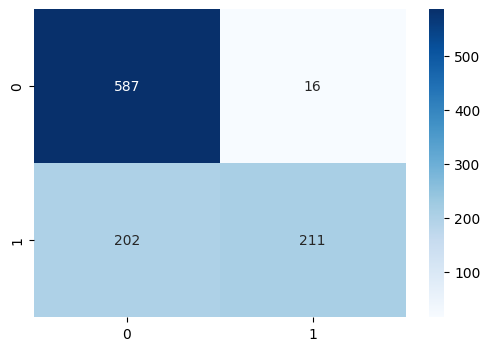

In [176]:
conf_mat = confusion_matrix(validation_labels, preds_labels)
list_labels = df_train.target.unique()
nb_classe = np.arange(0,2)
df_cm = pd.DataFrame(conf_mat, index = [label for label in range(0,list_labels.shape[0])],columns = [i for i in nb_classe])
plt.figure(figsize = (6,4))
sns.heatmap(df_cm, annot=True, fmt='d',cmap="Blues")


In [188]:
inputs_test = tokenizer(tokens_test,
                   padding=True,
                   return_tensors="tf",
                   max_length = 141,
                   truncation=True)

In [190]:
inputs_test['input_ids']

<tf.Tensor: shape=(3263, 41), dtype=int32, numpy=
array([[  101,  2074,  4148, ...,     0,     0,     0],
       [  101,  2963,  2055, ...,     0,     0,     0],
       [  101,  2045,  2022, ...,     0,     0,     0],
       ...,
       [  101,  2665,  2240, ...,     0,     0,     0],
       [  101, 12669,  3277, ...,     0,     0,     0],
       [  101,  2103, 11253, ...,     0,     0,     0]], dtype=int32)>

In [191]:
input_test_ds = tf.data.Dataset.from_tensor_slices(inputs_test['input_ids']).batch(64)

In [193]:
validation_preds = []
for b_inputs_test in input_test_ds:
                
    # Mettre le modèle en mode d'évaluation
    outputs = model.predict(b_inputs_test)
    # get the predictions.
    logits = outputs[0]
    validation_preds.append(np.argmax(logits,axis = 1))

2/2 [==============================] - 0s 97ms/step


In [194]:
preds_labels_test = np.array(list(itertools.chain.from_iterable(validation_preds)))

In [245]:
df_submission = pd.DataFrame([df_test.id.values,preds_labels_test]).T
df_submission = df_submission.rename(columns={0 :'id',1:'target'})

In [246]:
df_submission

,id,target
0,0,0
1,2,0
2,3,1
3,9,1
4,11,1
...,...,...
3258,10861,0
3259,10865,1
3260,10868,1
3261,10874,0


In [249]:
df_submission.to_csv('/kaggle/working/sample_submission.csv')